In [1]:
#import tweepy
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_score

In [2]:
api_key = "DSWM4DG0dA24FLNES9fjYvOU2"
api_secret_key = "4Iae2GFNG7Ycg6QrdS2K2qFndn9V951Ty6pnCvfVnYKGcTRqcC"
access_token = "1189906063346135042-9dosXnpfLdYV9LPKDhQo1r9SjXuKpG"
access_token_secret = "UhDwUWP85WNbtpxNQPCAdmIlOZFfkVVsZIllba4zl5i8T"

In [3]:
#auth = tweepy.OAuthHandler(api_key, api_secret_key)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

query = 'Avengers Endgame'


List
#tweetan=[]
tanggal=[]
teks=[]
Id=[]
sn=[]
source=[]
rtc=[]
rts=[]
hashtag =[]

for tweet in tweepy.Cursor(api.search, q=query, count=10, lang = "en",since = "2021-04-29").items():    
    tweetan.append(tweet)
    tanggal.append(tweet.created_at) 
    teks.append(tweet.text.encode('utf-8'))
    Id.append(tweet.id)
    sn.append(tweet.user.screen_name)
    source.append(tweet.source)
    rtc.append(tweet.retweet_count)
    hashtag.append([x['text'] for x in tweet.entities['hashtags']])
    if 'RT' in tweet.text :
        rts.append(1)
    else :
        rts.append(0)
    print(len(Id))

NameError: name 'List' is not defined

In [4]:
data = pd.DataFrame()
data['Tanggal']=tanggal
data['Tweets']=teks
data['ID']=Id
data['Screen Name']=sn
data['Banyak Retweet']=rtc
data['Source']=source
data['Retweet Status']=rts
data['Hashtags'] = hashtag
data.to_csv('Avengers.csv',index=False)

NameError: name 'tanggal' is not defined

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inputdata/dataset.xlsx
/kaggle/input/d/sunnysweca/dataset/dataset.xlsx


In [6]:
!pip install openpyxl

     |████████████████████████████████| 243 kB 1.2 MB/s 


In [7]:
df = pd.read_excel('/kaggle/input/inputdata/dataset.xlsx')
df.head()

,Tanggal,Value,Tweets,Unnamed: 3,Screen Name,Unnamed: 5,Source,Retweet Status,Hashtags,Unnamed: 9,Unnamed: 10
0,2021-04-30 16:22:33,1,b'@JayKeyFN 1) Avengers Endgame Collab\n2) Sta...,NaN,GreenieDaArtist,NaN,Twitter for Android,0.0,[],NaN,NaN
1,2021-04-30 16:22:23,1,b'@JayKeyFN 1. All of Chapter 2 Season 4\n2. T...,NaN,EpicSansMain_,NaN,Twitter for Android,0.0,[],NaN,NaN
2,2021-04-30 16:22:00,0,b'Imagine I went to Olongapo with no one and w...,NaN,yvnnxvrn_,NaN,Twitter for Android,0.0,[],NaN,NaN
3,2021-04-30 16:14:48,1,b'Avengers Endgame rewatch. \nOh boy!\nTony!!!...,NaN,SongWarmonger,NaN,Twitter for Android,0.0,[],NaN,NaN
4,2021-04-30 16:11:52,1,b'@momsfilms Thanks Anne. Feeling a bit better...,NaN,SongWarmonger,NaN,Twitter for Android,0.0,[],NaN,NaN


In [8]:
#Data yang sudah di Crawling, didownload dan ditambahkan kolom value
#value 1 untuk komentar positif
#value 0 untuk komentar negatif

In [9]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

stopwords = set(STOPWORDS)

def show_wordcloud(feature,df):
    data = df.loc[~df[feature].isnull(), feature].values
    count = (~df[feature].isnull()).sum()
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle("Prevalent words in {} ({} rows)".format(feature,count), fontsize=20)
    fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

def show_confusion_matrix(valid_y, predicted, size=1, trim_labels=False):
    mat = confusion_matrix(valid_y, predicted)
    plt.figure(figsize=(4*size, 4*size))
    sns.set()
    target_labels = np.unique(valid_y)
    if(trim_labels):
        target_labels = [x[0:70] for x in target_labels]
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=target_labels,
                yticklabels=target_labels
               )
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

In [10]:
df.info

<bound method DataFrame.info of                  Tanggal  Value  \
0    2021-04-30 16:22:33      1   
1    2021-04-30 16:22:23      1   
2    2021-04-30 16:22:00      0   
3    2021-04-30 16:14:48      1   
4    2021-04-30 16:11:52      1   
...                  ...    ...   
1527 2021-04-29 00:02:54      1   
1528 2021-04-29 00:02:54      1   
1529 2021-04-29 00:02:51      1   
1530 2021-04-29 00:01:44      1   
1531 2021-04-29 00:01:23      1   

                                                 Tweets  Unnamed: 3  \
0     b'@JayKeyFN 1) Avengers Endgame Collab\n2) Sta...         NaN   
1     b'@JayKeyFN 1. All of Chapter 2 Season 4\n2. T...         NaN   
2     b'Imagine I went to Olongapo with no one and w...         NaN   
3     b'Avengers Endgame rewatch. \nOh boy!\nTony!!!...         NaN   
4     b'@momsfilms Thanks Anne. Feeling a bit better...         NaN   
...                                                 ...         ...   
1527  b'@taecutweb @BTS_twt AVENGERS ENDGAME \n\nI

In [11]:
df.columns

Index(['Tanggal', 'Value', 'Tweets', 'Unnamed: 3', 'Screen Name', 'Unnamed: 5',
       'Source', 'Retweet Status', 'Hashtags', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [12]:
df

,Tanggal,Value,Tweets,Unnamed: 3,Screen Name,Unnamed: 5,Source,Retweet Status,Hashtags,Unnamed: 9,Unnamed: 10
0,2021-04-30 16:22:33,1,b'@JayKeyFN 1) Avengers Endgame Collab\n2) Sta...,NaN,GreenieDaArtist,NaN,Twitter for Android,0.0,[],NaN,NaN
1,2021-04-30 16:22:23,1,b'@JayKeyFN 1. All of Chapter 2 Season 4\n2. T...,NaN,EpicSansMain_,NaN,Twitter for Android,0.0,[],NaN,NaN
2,2021-04-30 16:22:00,0,b'Imagine I went to Olongapo with no one and w...,NaN,yvnnxvrn_,NaN,Twitter for Android,0.0,[],NaN,NaN
3,2021-04-30 16:14:48,1,b'Avengers Endgame rewatch. \nOh boy!\nTony!!!...,NaN,SongWarmonger,NaN,Twitter for Android,0.0,[],NaN,NaN
4,2021-04-30 16:11:52,1,b'@momsfilms Thanks Anne. Feeling a bit better...,NaN,SongWarmonger,NaN,Twitter for Android,0.0,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1527,2021-04-29 00:02:54,1,b'@taecutweb @BTS_twt AVENGERS ENDGAME \n\nI v...,NaN,HOUSEIFCARDS_,NaN,Twitter for iPhone,0.0,"['BTSARMY', 'BestFanArmy', 'iHeartAwards']",NaN,NaN
1528,2021-04-29 00:02:54,1,b'@noellearchives Hmm I think: Guardians of th...,NaN,wanda_maxiii,NaN,Twitter for iPhone,0.0,[],NaN,NaN
1529,2021-04-29 00:02:51,1,b'I literally will scream in joy when he says ...,NaN,LeekingMemory,NaN,Twitter for Android,0.0,[],NaN,NaN
1530,2021-04-29 00:01:44,1,b'@FreddyInSpace I blame it on an over relianc...,NaN,LethoPeane,NaN,Twitter for Android,0.0,[],NaN,NaN


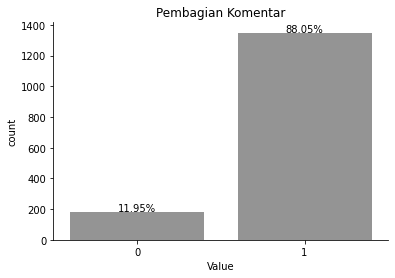

In [13]:
fig1 = sns.countplot(x='Value',data=df, color='#949494')
fig1.set_title('Pembagian Komentar')
total = float(len(df))
for p in fig1.patches:
    height = p.get_height()
    fig1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
sns.despine()

In [14]:
df.isna().sum()

Tanggal              0
Value                0
Tweets               0
Unnamed: 3        1532
Screen Name         26
Unnamed: 5        1532
Source              26
Retweet Status      26
Hashtags            26
Unnamed: 9        1531
Unnamed: 10       1531
dtype: int64

In [15]:
train = df[:int(len(df)*0.5)]
test = df[int(len(df)*0.5):-1]

In [16]:
print(len(train))
print(len(test))

766
765


In [17]:
from keras.preprocessing.text import Tokenizer

In [18]:
data_tweet = train['Tweets']
data_tweet.head()

0    b'@JayKeyFN 1) Avengers Endgame Collab\n2) Sta...
1    b'@JayKeyFN 1. All of Chapter 2 Season 4\n2. T...
2    b'Imagine I went to Olongapo with no one and w...
3    b'Avengers Endgame rewatch. \nOh boy!\nTony!!!...
4    b'@momsfilms Thanks Anne. Feeling a bit better...
Name: Tweets, dtype: object

In [19]:
token = Tokenizer()
token.fit_on_texts(train['Tweets'])
seq_data_tweet = token.texts_to_sequences(train['Tweets'])
enc_data_tweet = token.sequences_to_matrix(seq_data_tweet,mode="tfidf")

In [20]:
label = train['Value']

In [21]:
x_train = enc_data_tweet
y_train = label

In [22]:
token_test = Tokenizer()
token_test.fit_on_texts(test['Tweets'])
seq_data_tweet_test = token.texts_to_sequences(test['Tweets'])
enc_data_tweet_test = token.sequences_to_matrix(seq_data_tweet_test,mode="tfidf")

In [23]:
label_test = test['Value']

In [24]:
x_test = enc_data_tweet_test
y_test = label_test

In [25]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC()

In [26]:
pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[  1,   0],
       [ 15, 749]])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.06      1.00      0.12         1
           1       1.00      0.98      0.99       764

    accuracy                           0.98       765
   macro avg       0.53      0.99      0.55       765
weighted avg       1.00      0.98      0.99       765

